In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-prediction/heart.csv


In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
data=pd.read_csv('/kaggle/input/heart-attack-prediction/heart.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [5]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,0.85
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0.40
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0.15
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,0.82
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0.39


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.536390
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.285822
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.260000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.710000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,0.810000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.900000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
data.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0.16
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,0.73
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,0.85
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0.15


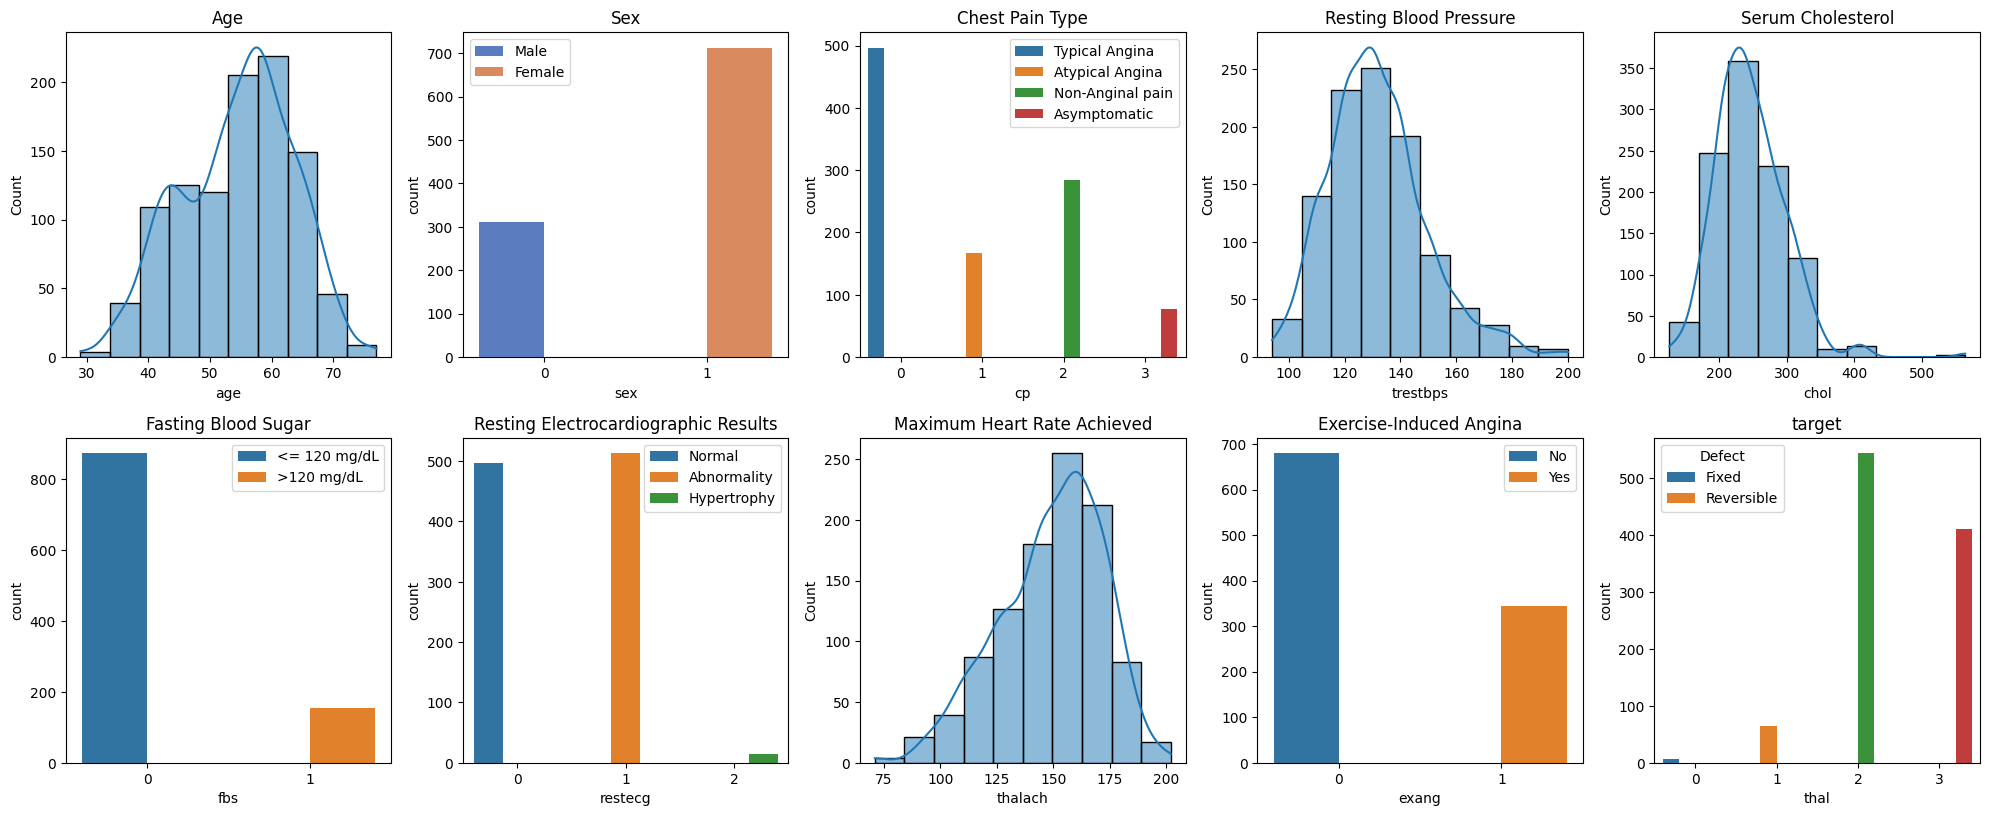

In [10]:
plt.figure(figsize=(20, 20))
#Age plot
plt.subplot(5,5,1)
sns.histplot(data['age'], bins=10 , kde=True)
plt.title('Age');
#Sex plot
plt.subplot(5, 5, 2)
pt = sns.countplot(x='sex', hue='sex', data=data, palette='muted')
plt.title('Sex')
plt.legend(labels=['Male', 'Female'])
# Chest Pain Type Distribution
plt.subplot(5, 5, 3)
pt = sns.countplot(x='cp', hue='cp', data=data)
plt.title('Chest Pain Type')
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])

# Resting Blood Pressure Distribution
plt.subplot(5, 5, 4)
sns.histplot(data['trestbps'], bins=10, kde=True)
plt.title('Resting Blood Pressure')

# Serum Cholesterol Distribution
plt.subplot(5, 5, 5)
sns.histplot(data['chol'], bins=10, kde=True)
plt.title('Serum Cholesterol')

# Fasting Blood Sugar Distribution
plt.subplot(5, 5, 6)
pt = sns.countplot(x='fbs', hue='fbs', data=data)
plt.title('Fasting Blood Sugar')
plt.legend(labels=['<= 120 mg/dL','>120 mg/dL'])

# Resting Electrocardiographic Results Distribution
plt.subplot(5, 5, 7)
pt = sns.countplot(x='restecg', hue='restecg', data=data)
plt.title('Resting Electrocardiographic Results')
plt.legend(labels=['Normal','Abnormality','Hypertrophy'])

# Maximum Heart Rate Achieved Distribution
plt.subplot(5, 5, 8)
sns.histplot(data['thalach'], bins=10, kde=True)
plt.title('Maximum Heart Rate Achieved')

# Exercise-Induced Angina Distribution
plt.subplot(5, 5, 9)
pt = sns.countplot(x='exang', hue='exang', data=data)
plt.title('Exercise-Induced Angina')
plt.legend(labels=['No','Yes'])

plt.subplot(5, 5, 10)
pt = sns.countplot(x='thal', hue='thal', data=data)
plt.title('target')
plt.legend(title='Defect',labels=['Fixed','Reversible'])

plt.tight_layout()
plt.show()

In [11]:
X= data.drop('target',axis=1)
y=data['target'].astype(int)

# train test split
X_train, X_test, y_train,y_test = train_test_split(X,y ,random_state=0,test_size=0.2)
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:{:.2f}".format(accuracy))

#confusion matrix
conf_matrix= confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

#classification
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)

Accuracy:1.00

Confusion Matrix:
 [[205]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       205

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [12]:
#Random Forest Classifier model with parameter n_estimators=5
rfc= RandomForestClassifier(n_estimators=50, random_state=0)

# fit the model to the training set
rfc.fit(X_train, y_train)


# Predict on the test set results
y_pred_5 = rfc.predict(X_test)

# Check accuracy score 
print('Model accuracy score with decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with decision-trees : 1.0000
